# Traffic Sign Recognition

**The goal of this project is to build a robust traffic signs classifier by the magical powers of deep neural networks and the the dataset provided by the German Traffic Signs Dataset [here](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset). Here are the main steps that I took to achieve this:**

* Downloading and loading the `pickle` data which comprised of (train, valid, test) sets.
* Analyzing the data and making sense of its distribution.
* Designing a preprocessing pipeline for the data.
* Designing and building the image classifier's model architecture built with CNN, analyzing and improving the model to get a more robust model.   
* Applying the preprocessing pipeline on the data and feeding it to the model to train, then monitoring the and analyzing the training and validation accuracy to add improvements like dropout and data augmentation.
* Testing the model on the test data.
* Testing the model on 5 images from the German Traffic Signs Dataset and analyzing the results to understand the model.
* Visualizing each step of the model by visualizing the each layer's activation.

    
# Dataset Summary & Exploration
-----
In this section we'll explore the data and visualize it to get a better sense of the dataset and its distribution.

Our data is composed of:

* `34,799` Training Images and their labels
* `4,410` Validation Images and their labels
* `12,630` Testing Images and their labels
* The Images are colored of shape `32x32x3`
* And its represents `43` classes (signs)

**NOTE:** Though 34,799 is not a big number to train our model on, but we'll see how we're going to remedy this though the course of this project.

## Extras to the Notebook

We'll be writing a lot of code in our [`jupyter notebook`](Traffic_Sign_Classifier.ipynb), so to keep everything nice and clean we'll be adding most of our code to utility and other modules that'll be used in the notebook. 

External files that will be used in this notebook are: 

* [`utils.py`](utils.py)
* [`datasetclasses.py`](datasetclasses.py)
* [`imageutils.py`](imageutils.py)

We'll also be working with some images that will be stored in `assets` folder.

**NOTE:** Please refer to the [`jupyter notebook`](Traffic_Sign_Classifier.ipynb) if you need more information about any section of this document.

## Training data distribution 
Let's get to better know our data set by learning its labels (classes), here we get the labels number and their mapping from the `signnames.csv` file as shown below:

### Dataset Class Names

| ClassId|SignName| 
|:------:|:--------------------------------------------:| 
| 0|Speed limit (20km/h)                                | 
| 1|Speed limit (30km/h)                                | 
| 2|Speed limit (50km/h)                                | 
| 3|Speed limit (60km/h)                                | 
| 4|Speed limit (70km/h)                                | 
| 5|Speed limit (80km/h)                                | 
| 6|End of speed limit (80km/h)                         | 
| 7|Speed limit (100km/h)                               | 
| 8|Speed limit (120km/h)                               | 
| 9|No passing                                          | 
| 10|No passing for vehicles over 3.5 metric tons       | 
| 11|Right-of-way at the next intersection              | 
| 12|Priority road                                      | 
| 13|Yield                                              | 
| 14|Stop                                               | 
| 15|No vehicles                                        | 
| 16|Vehicles over 3.5 metric tons prohibited           | 
| 17|No entry                                           | 
| 18|General caution                                    | 
| 19|Dangerous curve to the left                        | 
| 20|Dangerous curve to the right                       | 
| 21|Double curve                                       | 
| 22|Bumpy road                                         | 
| 23|Slippery road                                      | 
| 24|Road narrows on the right                          | 
| 25|Road work                                          | 
| 26|Traffic signals                                    | 
| 27|Pedestrians                                        | 
| 28|Children crossing                                  | 
| 29|Bicycles crossing                                  | 
| 30|Beware of ice/snow                                 | 
| 31|Wild animals crossing                              | 
| 32|End of all speed and passing limits                | 
| 33|Turn right ahead                                   | 
| 34|Turn left ahead                                    | 
| 35|Ahead only                                         | 
| 36|Go straight or right                               | 
| 37|Go straight or left                                | 
| 38|Keep right                                         | 
| 39|Keep left                                          | 
| 40|Roundabout mandatory                               | 
| 41|End of no passing                                  | 
| 42|End of no passing by vehicles over 3.5 metric tons | 



### Dataset Images Examples

Here is an example for each data class from our dataset:

![All%20signs.png](./test_images_output/All%20signs.png)


Let's now see some random images from the dataset to see how images can look like:

![random_dataset_images.png](./assets/random_dataset_images.png)

As we can see some images are dim others are bright, some are tilted and others are blurred. That shows that our dataset images can vary in quality and condition, this will be a recurring theme that we'll be addressing in preprocessing and augmentation later in the project.   

We got a nice random representation of our data which shows some of the signs above.


Now onto more important things, in order for our model to train properly and give good results our training dataset should have good representation of each sign, ideally equal number of images but we'll settle for a uniform one. Here we plot our training data distribution which shows how many occurrences each class (sign) is in the training dataset:


![classes_table.png](./assets/classes_table.png)


**Conclusion:** as we can see from the graph above our training dataset is highly skewed towards some classes while other classes have really low number of images.For example, **Speed limit (50km/h)** has the highest count of **2,011** images while **Go straight or left** has the lowest count of **181**. This will make our model biased towards signs with higher image counts and maybe it wont be able to correctly classify signs with counts below 300 all the time.


# Design and Test a Model Architecture

---------
Here we explore different techniques to best preprocess our dataset and get it ready for training. We gained inspiration from the **LeNet** and other image classification models to create our model.

## 1.Preprocessing
-------

Here are the preprocessing techniques that we explored and implemented on our dataset:

* Data Shuffling
* Normalization (Mean Normalization)
* Grayscaling
* Image Enhancement (sharpness) 
* Image Correction (Lighting)
* Image Augmentation (Rotation, skewing, blurring)



### Data shuffling 

So as it stands our training dataset images are ordered as we'll see in the first 12 images here: 
![first_12_images.png](./assets/first_12_images.png)
So we shuffled our data using the `shuffle()` method of the `sklearn` utils methods to shuffle our images and their labels, and we got a better random representation of the dataset as we can see below the first 12 images after shuffling:
![random_first_12.png](./assets/random_first_12.png)

### Image Normalization

Normalization, feature scaling, or standardization is the last step in preprocessing our dataset but we'll explain it here cause its going to be mentioned a lot in the coming preprocessing techniques. It standardizes our dataset features and bounds them to a range from [0,1], [-1,1], or other which helps our model execute faster due to this mathematical optimization.
Here are two ways of normalizing our data 
1. An implementation of MINMAX which applies `(pixel - 128)/ 128` to every pixel of the image
2. Mean normalization applying `(pixel - images_mean) / images_std` to every pixel of the image

We opted for the second method where we apply **Mean normalization** to all of our *training*, *validation*, and *test* datasets with the `images_mean` and `images_std` as the training dataset's `mean` and `standard deviation` respectively.

![RGB_normalized.png](./assets/RGB_normalized.png)

Here is another example of a normal image and its globally normalized counterpart:

|Normal RGB image| Normalized Image|
|:-:|:-:|
|![normal_image.png](./assets/normal_image.png)|![normalized_image.png](./assets/normalized_image.png)|



### Grayscaling


`Grayscaling` the dataset images was a really a good choice for we found out that gave clearer images for different lighting scenarios, it also normalizes well and doesn't lose information or create artifacts like in the `RGB` images as we'll see in the images below:

![normalized_grayscale.png](./assets/normalized_grayscale.png)

So as a result we used `Grayscaled` images not only for the benefits mentioned above but also because it enables us to  to apply th contrast adjustments techniques that we'll mention in the next section. 

### Image Lighting

We tried out three techniques to correct the image lighting by adjusting its contrast, these techniques are:
* Adaptive Thresholding
* Histogram equalization
* Adaptive Histogram equalization

These techniques were applied using **OpenCV** `cv2` module and their implementation is in the [`imageutils.py`](./imageutils.py) file.  

#### Adaptive Thresholding

Adaptive thresholding is a technique used to emphasize image edges regardless of the lighting condition, here are the  resulted images:

![adaptive_thresholding.png](./assets/adaptive_thresholding.png)

While adaptive thresholding removes much of the image noise it also removes a lot of some signs features, so we moved on to  another technique.

#### Histogram Equalization

Histogram equalization is a technique that transforms the image to a more bright if it was dark and vise versa, this technique maps image pixels from one end of the spectrum (bright or dark) to the full range of the image. This equalization makes sure that the image makes use of its full light spectrum (contrast) so images appear more clear, it gives us uniform lighting over all of the image pixels. It does this by equalizing all pixel intensities to with the global image intensity.

![histogram_equalization.png](./assets/histogram_equalization.png)

Most of our images now appear clearer especially the low lit and low contrast ones, but in the process of lighting these images up we sacrificed some of their features. Some of the images lost their definition, thats why we then applied the Adaptive Histogram Equalization which should deal with this issue.

#### Adaptive Histogram Equalization (CALHE)

This is the Adaptive version of the Histogram equalization Contrast Limited Adaptive Histogram Equalization CALHE for short, which limits the contrast applied to each pixels by its neighboring pixels, so pixels cant be affected by really bright or dim pixels that are not even near them. This technique needs a filter or a grid size of how far from a pixel should we consider neighbors, in our implementation we chose a `3x3` grid size due to our  small image size.

![calhe.png](./assets/calhe.png)

Now our image information is more defined and our image contrast it decent and well distributed through the image, thats why we ended up using this in our preprocessing pipeline.

#### Conclusion:
We settled on the `CALHE` approach cause it correctly fixes our image lighting situation which gives us clearer images to train our network on, this also showed when we tested its accuracy versus `Grayscale` and `RGB` as we'll see in the next sections.

**NOTE:** 

You can find out more information on the **Histogram Equalization** implementation in this [link] (https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html) and you can also visit the [wikipedia](https://en.wikipedia.org/wiki/Histogram_equalization) page for more information about the subject in general.


### Image Enhancement

After working a lot on the project and improving its techniques I got an idea of enhancing the dataset images before applying any preprocessing or augmentation, for the images are `32x32x3` and of blurry and bad quality. So I added image sharpening to the preprocessing pipeline that we execute on our *training*, *validation*, *testing*, and any other image we train or infer. Here is an example of image sharpening:
![image_sharpening.png](./assets/image_sharpening.png) 



As you can see the image is a bit clearer, but not by a huge factor cause while trying out different factors on all the images some images get too distorted and ignore main sing features, so by experimentation we fount that `3` is a good sharpening factor.

We had 2 sharpening methods to choose from, one self made and the other using **PIL's** (Python Image Library) `ImageEnhance` which we opted for at the end because it proved more robust for all of our dataset images.

### RGBG
We also explored the possibility of combining the Colored and Gray channels, so we can get the combined benefits of the color information in the <span style="color:red">R</span><span style="color:green">G</span><span style="color:blue">B</span> and the contrast CALHE equalized <span style="color:gray">Gray</span> in one image of shape `32x32x4`. We'll see below in the approach section how did this workout.

### Image Augmentation

Our dataset is class counts are imbalanced, some labels have more than **1500** images while others have fewer than **500** images and ones have as low as **181** images. This skewed representation will influence our model to bias its  classification towards classes with higher number of images, and it'll decrease the probability of correctly classifying low numbered images. In other works this will teach our model to "overfit" the higher number labels, which results in bad model generalization on all labels which will lead to poor accuracies and ultimately a bad classifier. 

In a perfect world we can solve this by getting more data, but here in reality we'll have to create our own by augmenting our existing dataset to get more versions of it. The augmentations that we applied were ones that are applicable to the context of the dataset like rotate, add noise, blur, brighten, etc.. 

Here are possible real world conditions for traffic signs that we might be able to augment: 
* Low resolution images
* lighting conditions (saturations, low-contrast)
* motion-blur
* sunglare
* Shade
* physical damage
* colors fading
* graffiti 
* point of view or perspective

So Lets create our own augmentations that replicates some of the conditions listed above, we'll apply  augmentations to replecate some of the real world conditions that can affect the traffic signs. 

* `blur_image()` to replicate motion-blur from video extracted images or bad quality
* `augment_image_pov` to replicate different perspectives or points of view of the image taken
* `rotate()` to replicate physical damage or camera rotation
* `bright_dim_image` to replicate different lighting conditions
* `fade_color()` to replicate physical damage and fading paint

Below we used techniques from multiple libraries and modules like `scipy.ndimage`, `openCV`, `skimage.transform`, `PIL`, and own implementation, all of these methods are implemented in the [`imageutils.py`](imageutils.py) file.


#### Old Augmentation

We started out with just a handful of augmentations and even some of them like the rotate gave dark images, here is the first version of image augmentations that we used: 

![augmented_images.png](./assets/augmented_images.png)


#### New Augmentation

Then after some search and coding we made another larger and more meaningful augmentations which we ended up using in our final model, we also applied them on **CALHE** images just to save some time because we're going to convert them anyway. 

Here are the new and improved image augmentations:

![image_aug.png](./assets/image_aug.png)

As you can see these augmentations are way better than the original we also improved the `rotate()` implementation as you can see above.

We applied these 10 augmentations relatively to images that need more data representation like **Speed limit (20km/h)** and **Go straight or left** which increased their image counts significantly. 

This addition of meaningful real world augmentations will balance our dataset skewed representation which will create a more robust traffic signs classifier, notice that we didn't apply these augmentations to all our classes thats because if we do that we're just scaling up the imbalanced data representation and will end up in the same place we started. We'll talk more about the actual values and how the distribution looks in the approach section.


### Preprocess Pipeline
Here is the final preprocessing pipeline:
1. Enhance all images
2. Convert all images to **CALHE**, which include converting to **Grayscale** first.
3. Apply *relative* augmentation to our training dataset
3. Then finally apply normalization with the new images mean and standard deviation to all sets


In the course of finding the optimal pipeline we reordered these steps and ended up with this variation.
We created 2 main methods `preprocess()` and `augment()` in the project [notebook](Traffic_Sign_Classifier.ipynb), these methods call methods from the [`imageutils`](imageutils.py) module that you can go and explore how they work.

#### 1. Image Enhancements
So we first **enhanced** all of our images in *training, validation, and test* for the purpose of training and evaluation.

#### 2. CALHE
Then we converted all images to **Grayscale** then equalized them using **CALHE**. 

#### 3. Relative Augmentation
Then we applied **relative** augmentation only on our training dataset; relative augmentation here means that we only augmented classes with image count less that a *Threshold*. Our threshold was **1600** images, so our method went through our classes and found classes with image counts less than **1600** images then it applied augmentations on these classes for them to reach that threshold. We tuned our threshold several times first we started with the distribution's mean which was **810**, but the data generated wasn't enough for low count classes, then with some trial and error we got the best results using the value mentioned above.

Here is the result after applying the relative augmentation:

![augmented_data_distribution.png](./assets/augmented_data_distribution.png)

So by doing so we now have a more uniform distribution and close to equal image representation that should eliminate the huge bias that  we first had in our data. This new distribution has a *mean* of **1,649** more than twice the original **810**, and **Go straight or left** now has **1,601** images so does most of the classes. This increased the class with the lowest number **181** to **1,601** a 9 fold increase of meaningful image variation, apart from solving our imbalanced distribution problem this increased our **training** dataset from **34,799** to **70,879** thats more than twice our original dataset size. These two new improvements that resulted from our approach to data augmentation will give us a more robust classifier.

#### 4. Data Normalization

As we said before normalization or standardization is a process of range binding our image data to low float values like [-1,1] to *mathematically optimize* our data and make it easy for our machine to execute hardware intensive operations on such a huge number of data. So after we were done with all of the other preprocessing operations we applied *global mean* standardization on all of our datasets(training, validation, and testing) using the *mean* and *standard deviation* of the new **CALHE** augmented images. Then we fed our datasets to the model that we're going to talk about in the next section.


#### NOTE: This pipeline is applied to our training, validation, testing, and any other images that use the model for inference.

## 2. Model Architecture
------

Here is the model inspired by LeNet and other CNNs, its called MoNet following the same convention used in LeNet the of course stands for Model not the first 2 letters of my name ;).

![MoNet0.1.png](./assets/MoNet_correct.png)

So as we can see its the same as the LeNet architecture with few key differences, which are 
* One more `conv_maxpool` layer (I combined the convolutional and the maxpool in one method)
* Deeper filters to capture more information about the image
* Deeper fully connected layers
* Dropout added after each convolutional and fully connected layer to regularize our model

First I started with the LeNet model then I added a convolutional layer which gave better results, then I started running different tests to get a good depth for my network:



| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input Image         	| Normalized CALHE 32x32x1 image   				| 
| Convolution 5x5     	| 1x1 stride, VALID padding, outputs 28x28x32 	|
| RELU					| Non linearity activation function			    |
| Dropout               | Applies dropout of 0.75, 0.70, 0.65, 0.60, 0.55                       |
| Max pooling	      	| 2x2 stride,  outputs 14x14x32 				|
| Convolution 5x5     	| 1x1 stride, VALID padding, outputs 10x10x64 	|
| RELU					| Non linearity activation function				|
| Dropout               | Applies dropout of 0.75, 0.70, 0.65, 0.60, 0.55                      |
| Max pooling	      	| 2x2 stride,  outputs 5x5x64 				    |
| Convolution 5x5     	| 1x1 stride, SAME padding, outputs 5x5x128 	|
| RELU					| Non linearity activation function				|
| Dropout               | Applies dropout of 0.75, 0.70, 0.65, 0.60, 0.55                  |
| Max pooling	      	| 2x2 stride,  outputs 2x2x6128 			    |
| Flattening            | Flattened the 2x2x128, output 512	feature array|
| Fully connected		| Takes 512, and outputs 512        			|
| Dropout               | Applies dropout of 0.50                       |
| Fully connected		| Takes 512, and outputs 256      				|
| Dropout               | Applies dropout of 0.50                       |
| Logits (Classifier)	| Takes	256, outputs 43							|
| Cross Entropy loss	| Softmax cross entropy 						|
| AdamOptimizer         | Optimize the model with a decaying learning rate|

## 3. Training the Model
-------

### Model Training

I used my personal PC to train, evaluate, and test the model, I used `Tensorflow-GPU` which ran on an **NVIDIA GTX 980-ti** which is a decently fast *GPU* for training the model and its still good at games. Though the *GPU* is tough and performs  fast operation, however, training took a long time some of which too up to `3` hours(augmented RGBG).

### Model HyperParameters

A model's hyperparameters are the way we tune and manage how are model performs, and its essential that they get set correctly in order for the model to give its optimal performance. We set and played around with alot of parameter in this project and for the nature of its complexity it took days to train the model on different variations which we'll be seeing in the section below, but here are the hyperparameters that we tuned in the course of this project:


**Batch size:** I started with a batch size of `128` which is kind of the default for most machines, but it takes more time to train especially after applying augmentation. So I ran tried and tested on different multiples `256`, `512`, then stopped at `1024` cause I felt that it was fast enough and didn't want to compromise the **mini- batch SGD** and overfit. 
 
**Epochs:** At the start I used `30 epoch` which is funny when I look back at it, then when I started adding more depth, lower learning rate, and dropout to my network it became clear that I needed a bigger number so I went with `50` then `100`, `500`, `1000`, and even `2000` which takes 3.5 hours to train. mainly I used lower number of epoch like `100` or `500` to validate variation of parameters that I was testing then I used the heavy hitters `1000`, and `2000` to get the best accuracy possible, it was mainly a difference of less that `1%` but I was striving for the best accuracy.

**learning rate:** Here I started with `0.001` a low number from the get go because you can never go wrong with a low learning rate it will always converge to the (Not always), hopefully to the global minimum. However, we have to be wary of not overfitting, thats why I applied **dropout** to the network to keep the network from overfitting the training set. After some testing I even lowered the learning rate to `0.0001` which yielded better morestable results.

I also got to played around with the *optimizer* and ultimately chose the `AdamOptimizer` which is an implementation of the [Adam algorithm](https://arxiv.org/pdf/1412.6980.pdf) of the **Stochastic Gradient decent** created by *Diederik P. Kingma*, and *Jimmy Ba*. This `tf.train.AdamOptimizer()` is better than the `tf.train.GradientDescentOptimizer()` because it calculates the moving mean or **momentum** that automatically calculates the **adaptive learning rate** and increases or decreases it to get the optimal learning rate. However the algorithm takes more time due to the underlying computations, but it deals with fine tuning the learning rate to converge.
You can learn all about the algorithm and its implementation [here].(https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer)

**Friendly advice: don't change the epsilon parameter if you don't completely understand it**

## 4. Training Approach
-----

Our network went through multiple variations which iteratively improved its performance and finally got our final test accuracy to above **98%**. The model was tested and improved several times against many 

I did some exhaustive testing to see effect each small variation has on the end result, and by exhaustive I mean that my *GPU* worked like it never ever did before. First I tried the effect different **colors spaces** have on the training and validation accuracies, I also added in CALHE (Adaptive Histogram Equalization) into the mix to see how well it does against RGB and grayscale, I also t. I also explored different **normalization** techniques like MINMAX normalization and global mean normalization. I added **augmentation** and compared the results to the normal data before augmentation. Then I added **dropout**, changed its values, and even removed it all together from some layers. I experimented with other **non-linear activations** like leaky-relu and elu. I also tried out to combine the RGB and the CALHE layers **(RGBG)** which got me a **32x32x4** image. Below I'll be showing the result of these experiments and the results of the most successful run.

**NOTE:** The initial model had `3` `convolutional` of depths `[8, 16, 32]` and `2` `fully-connected` layers of depths `[128, 64]`, then a `logits` layer of depth `43` the number of classes.



### Normalization

 normalization on `2` color variations (RGB and Grayscale), the initial results were somehow disappointing cause the validation accuracy actually dropped after applying data normalization as we can see in the graphs below.

30 Epochs:

#### Colored Image

|    Type        |Normal Image|Normalized Image|
| ------------ |:---------------:|:---------------:|
| Accuracy|Training= 97.8% Validation= 91.8%  |Training = 99.1% Validation = 81.0%  |
|Graphs|<img src="./accuracies/30/Normal Color.png" alt="Normal Color" height="200" width="400"/>|<img src="./accuracies/30/Normalized Color.png" alt="Normalized Color" height="200" width="400"/>|


#### Grayscale 

|    Type        |Grayscale Image|Normalized Grayscale Image|
| ------------ |:---------------:|:---------------:|
| Accuracy|Training= 96.0% Validation= 88.0%  |Training = 99.5% Validation = 81.6%  |
|Graphs|<img src="./accuracies/30/Grayscale.png" alt="Grayscale" height="200" width="400"/>|<img src="./accuracies/30/Normalized Grayscale.png" alt="Normalized Grayscale" height="200" width="400"/>|


However, this was training the model for just `30` epoch and thought to increase the number of epochs, but I noticed that the training value increases and the validation accuracy decreases that and the *zigzag* shape of the graphs meant that the model was **overfitting**. This makes sense since normalization speeds up convergence, I asserted this by testing over `100` epochs as shown in the table below: 


|    Type        |Normal accuracy|Normalized accuracy|
| ------------ |:---------------:|:---------------:|
| Color|Training = 99.2% Validation= 94.0% |Training = 99.8% Validation = 64.6% |
|Grayscale|Training = 99.4% Validation = 93.4% |Training = 99.8% Validation = 73.8% |

So it turns out to be the same as `30` epoch with the only exception being the **CALHE** with high numbers in both tests. It seamed that the model was just over fitting, but as we'll see below the model's depth had a lot to do with it. 


### Depth
I increased the network depth form the initial depths to `[32, 64, 128]` for the `convolutional` layers filters, and `[512, 256]` for the `fully-connected` layers. This significantly deeper network did the trick and gave better result as and the deeper network in solving the solving the **overfitting** issue. Here are the results of the network depth on **RGB** and **Grayscale** images.



#### Colored Image

|    Type        |Normal Image|Normalized Image|
| ------------ |:---------------:|:---------------:|
| Accuracy|Training= 99.8% Validation= 92.0%  |Training = 100.0% Validation = 92.3.0%  |
|Graphs|<img src="./accuracies/100/depth_2Normal%20Color.png" alt="Normal Color" height="200" width="400"/>|<img src="./accuracies/100/depth_2Normalized%20Color.png" alt="Normalized Color" height="200" width="400"/>|


#### Grayscale 

|    Type        |Grayscale Image|Normalized Grayscale Image|
| ------------ |:---------------:|:---------------:|
| Accuracy|Training= 100.0% Validation= 94.1%  |Training = 100.0% Validation = 94.2%  |
|Graphs|<img src="./accuracies/100/depth_2Grayscale.png" alt="Grayscale" height="200" width="400"/>|<img src="./accuracies/100/depth_2Normalized Grayscale.png" alt="Normalized Grayscale" height="200" width="400"/>|


As we can see the network now achieves much higher accuracies and we can also see that the normalized graph is a lot smoother now which is mainly due to **overfitting**. I also tried out different weights for only the `fully-connected` layers; for example, `[256, 128]` but in the end the I settled on the combination thats mentioned above.

Judging by the accuracy increase from this example test and others I empirically derived that the **Grayscaled** images perform better overall and that the **deeper**models out perform the shallower ones, also we now need more epoch to train the model as it is deeper and takes more time to train; however, we can see that our validation accuracy doesn't change after about `40` epochs and our training accuracy is near a `100%` which meant that our model is **overfiting** and not generalizing well on to the validation set. Thats why I:

* Added dropout to prevent the model from overfitting 
* Getting more data through augmentation
 

### Dropout

I applied dropout which is a regularization technique that prevents our model from overfitting by setting a determined percentage of a layer's weights which are randomly selected to 0, so the model cannot depend on one feature or connection too much. 

I applied `2` variations of dropout:
1. dropout of 0.5 keep probability on only the fully connected layers
2. dropout of 0.75 and 0.5 keep probability on the convolutional and fully connected layers respectively

The two variations gave close results over `100` epochs, but the real difference was obvious over more epochs where the second variation gave an increase of about `3%`. So I chose the second variation and after comparing both the **Grayscale** an the **CALHE** versions, the **CALHE** preformed better than the **Grascale** by about `2-3%` validation accuracy, which made our validation accuracy jump to `98.5%` and our training accuracy to be close to a `100%`. Here is a graph of the the **CALHE** with dropout over `500` epochs. 

![Normalized%20Histogram%20dropout%20Dropout%20500.png](./accuracies/finaltests/Normalized%20Histogram%20dropout%20Dropout%20500.png)
 
Now we can see a smooth close training and validation accuracies.

### Augmentation

Now we have a **deep** model, with **dropou**t, thats feeds **normalized CALHE** images and trains over `500` epoch which produces above `98%` validation accuracy. I then proceeded to apply ***relative* data augmentation** which decreased the accuracy for the first couple of epochs then slightly increased the validation accuracy. It seemed that the addition of this new augmented data which increased the training dataset size from `34,799` to `63,000` images helped our model to learn better, this showed in the slight increase of the in validation accuracy of `99%`. Now that we have really solid model that performs well on the Training and validation set we can now turn our attention to the test set.

#### Improvement

After I had mostly everything in place I tried the model on testing set, which gave `96.9%` which is an amazing result and way over the required upper limit for this project. However, after looking into the augmentation pipeline I noticed that some of the methods needed some adjustments and I could add more augmentations to the images, so I added more augmentations and improved on the existing ones and now the training dataset size increased from `34,799` to `70,879`, but while the validation accuracy increased the test accuracy actually decreased to `95%`. That increase of dataset size and decrease of accuracy made me think of changing the dropout to reduce overfitting as we'll see next.

### Different variations 
 
I proceeded to tweak the hyperparameters, dropout values, and added image enhancements to increase the **test** accuracy, I saved each variation of the `MoNet` as a reference for comparison and then chose the best one. Here are the variations and their results:

**NOTE:** All the models were trained for 2000 epochs with a batch size of 1024, and a 0.0001 learning rate.

#### MoNet 0.1.1

This version of the network has the MoNet archtecture with:
* `0.60` keep probability for the convolutional layers and `0.50` for the fully connected layers.
* Image enhancements after histogram equalization.

The results were:
* `99.5%` Training accuracy
* `98.8%` Validation accuracy
* `95.8%` Test accuracy.

#### MoNet 0.1.2

This version of the network is the same as the `MoNet0.1.1` before it, but with a `0.55` keep probability for the convolutional layers, and a no image enhancements. So a decrease of **5%** to better generalize given the high epoch count.

We lowered the convolutional layer's dropout to `0.55` which is the lowest we'll be doing in this project, this is to prevent the network from over-fitting our training data over many epochs. The importance of **dropout** is that it helps generalize the model over the validation, test, or any example by randomly omitting 50% (the keep probability 100 - keep probability) of the layer's features by setting their weights to zeros, this helps the network to be independent of certain features and give notice to all features equally; for example, if we have a feature like rounded corners and we assign high weight to it all the time then it over shadows the other features because we're just increasing its weight without giving chance for the other features to get trained as well, but by adding a drop out we know that we give every feature a change in training which will in turn abstract some of the features that will help generalize to future edged examples per se.

This variation increased our **test** accuracy by about `2%` as we can see below.

With results:
* `99.9%` Training accuracy
* `99.4%` Validation accuracy
* `97.5%` Test accuracy.


#### MoNet 0.1.3

The exact same as `MoNet 0.1.2`, but we added back image enhancements which increased the **test** accuracy by `0.5%` and slightly decreased the validation accuracy.

* `99.9%` Training accuracy
* `98.8%` Validation accuracy
* `98.0%` Test accuracy


#### MoNet 0.1.4

Here we maintained the same *dropout* values for each the `convolutional` and the `fully connected` layers, but apply image enhancements before converting our images into histogram equalized **CALHE** images. We also added a **filter** to end the training if we get a validation accuracy above `99.5%`. Here we noticed no increase in the **test** accuracy but a slight increase of about `0.8%` for the **validation** accuracy.

* `99.9%`Training accuracy 
* `99.4%` Validation accuracy 
* `98.0%`Test accuracy


#### MoNet 0.1.5

Here we just reran the `MoNet 0.1.4` and adjusted the filter to make sure that the `99.5%` isn't resulted by a good guess, but consistent along at least 4 consecutive epochs.

* `99.9%` Training accuracy 
* `99.5%` Validation accuracy 
* `98.2%` Test accuracy 

#### MoNet 0.1.6

Here we just change the enhancement sharpness `factor` to **5** instead of the **3** that we've been using in previous tests. We notice a decrese of about `0.1%` for both the **validation** and **test** accuracies.

* `99.9%` Training accuracy = 
* `99.3%` Validation accuracy 
* `98.1%` Test accuracy 

#### MoNet 0.1.7


Here we'll be more ambitious and tryout our model on `RGBG` image which is the combination between both an `RGB` image and a `CALHE` gray image, the resulting image will be of size `32x32x4`. We'll try this out because maybe this will give us extra information from the colored `RGB` image and in turn give us more accurate results.

* `99.4%` Training accuracy   
* `97.8%` Validation accuracy  
* `97.7%` Test accuracy   


#### Chosen Version
Finally the chosen version of the trained model is the `MoNet0.1.3`, I initially chose `0.1.5` cause it has the highest accuracies of almost `100%` on training, `99.5%` on validation, and finally testing accuracy of `98.2%` **the highest accuracy yet**; however, after testing the model on the images below I decided to change it to `0.1.4` which gave better results, but then after further investigation I ended up choosing the `0.1.3` version which has close results to the other later versions and proved to be more robust delivering the highest accuracy for the test images as we'll see below.

## Testing The Model on New Images

### 1. Images and why were they chosen 

We added all project test images in `assets/test_images/project_test_images/` directory, we choose `6` images because we need to see how the network performs on different traffic signs of different shapes, conditions, and backgrounds.

Here is why we ended up selecting each of these images:
1. **Priority  road** because its under *dim lighting* and the sign itself doesn't follow the majority of either circular or triangular signs, so I'm curious of how it'll perform.
2. **Keep right** for the *warm lighting* condition that its under, and to test one of the *blue signs*. 
3. **Traffic signals** honestly, I can't make it out without squinting in the `32x32x3` format it has, also it had low representation in the original dataset.
4. **Stop** for its *noisy and distorted quality*, not to mention that its *skewed*. 
5. **Speed limit (20km/h)** due to the fact that it had one of the *lowest frequencies* in the original dataset, so this is a good way to affirm the belief that our added augmentations worked. Also the image is *skewed* and I've added a *graffiti* of my own here.
6. **No entry** because I took it under *low lighting conditions* in a video with *motion blur*, this will provide a good real world example plus its a *UAE traffic sign* which looks very close to its *German* counter part though as we see the line in the center is a bit shorter.

**NOTE: We also applied some distortion and paint to some images to simulate different qualities.**

![chosen_images.png](./assets/chosen_images.png)


#### Preprocessing the Test Images

We then proceeded to put the images into the *preprocessing pipeline*, were we got the enhanced, gray CALHE transformed, and normalized representation of the images as shown below:

![preprocessed_test_images1.png](./assets/preprocessed_test_images1.png)

### 2. Test Images results

#### Initial Results
Here are the inference results on the *6* test images:

|Prediction|True Class|Predicted Class|
|:--------:|:-------------------------:|:---------------------------:|      
|<span style="color:green">True</span>      |     Priority road         |     Priority road         |
|<span style="color:green">True</span>      |     Keep right            |     Keep right            |
|<span style="color:green">True</span>      |     Traffic signals       |     Traffic signals       | 
|<span style="color:green">True</span>      |     Stop                  |     Stop                  |
|<span style="color:green">True</span>      |     Speed limit (20km/h)  |     Speed limit (20km/h)  |
|<span style="color:green">True</span>      |     No entry              |     No entry              |

![test_images_redictions_1.png](./assets/test_images_redictions_1.png)

So we got a **100%** accuracy on these *6* test images a **2%** increase over our dataset test accuracy of **98%**, this might be because we're testing on a very small number of images **6** images to be exact versus the **12,630** test set images, so we're not encountering any of the **2%** (252 images) misclassified images we had for the test set. 

This spurred my interest an we tested the model's prediction on more test images either taken by my phone or from online images, we got perfect results form most but we had some special cases that'll be shown below.


#### Especial cases

**`MoNet0.1.4`**

We initially choose `0.1.4` as the best version for the model, but after investigating on more test images model proved to produce poor results for some signs like for the **End of no passing by vehicles over 3.5 metric tons**.  


![esp1.png](./assets/esp1.png)

As we see here our `0.1.4` version misclassified **End of passing by vehicles over 3.5 metric tons** as **End of speed limit (80km/h)** which in all fairness bears a lot of similarity to, for both of them are black and white and have lines going diagonally through them.

**`MoNet0.1.5`**

Then we tried out the `0.1.5` to see effect of these two mistrious signs:
![esp2.png](./assets/esp2.png)

Version `0.1.5`  does the opposite of `0.1.4` and it falsely classifies **No passing by vehicles over 3.5 metric tons** as **End of no passing by vehicles over 3.5 metric tons**, this  behaviour is rather peculiar because its virtually the same model with the only difference being that `0.1.5` have been trained for a couple of hundred epochs more. This suggests that each model overfit one of the signs and ignored the other, its still a very strange case that needs further investigation.

**`MoNet0.1.3`**

Finally we tried out the `0.1.3` version on the signs:

![esp3.png](./assets/esp3.png)

I ended up choosing the `MoNet0.1.3` due to its robust classification of all test signs, in addition to its handling of this especial case that baffled the other 2 variations. This variation also gives better softmax predictions on the test images and on the **UAE** test images that we'll see below.

### Softmax Probabilities

The Softmax probabilities were for the most part lack luster, most of the tests images that I ran the through the model gave near `100%` even, with others having less than an `0.1% ` for other predictions. That might reflect that our model is too sure of its results due the fact that it was trained on `70,879` over `2000` epochs, I don't know if thats a good or a bad thing cause for false classification as we'll  see in the section below it gives a very low value for the correct prediction  too.

![sm1.png](./assets/sm1.png)
![sm2.png](./assets/sm2.png)
![sm3.png](./assets/sm3.png)
![sm4.png](./assets/sm4.png)
![sm5.png](./assets/sm5.png)
![sm6.png](./assets/sm6.png)


### UAE Traffic Signs Test

Here we needed to test what results our model will give on **UAE(United Arab Emirates)** traffic signs that we took, some of these signs have Arabic writing like the **Stop** sign, and others are not in the original **German traffic signs** dataset like the second image were we labeled it as **Right-of-way at the next intersection** because its the closest counterpart in the dataset. We also have the **Traffic signal** that looks close to the **German sign** though the traffic lights are bordered by a black rectangular shape rather than white.

![uae_test_iamges.png](./assets/uae_test_iamges.png)

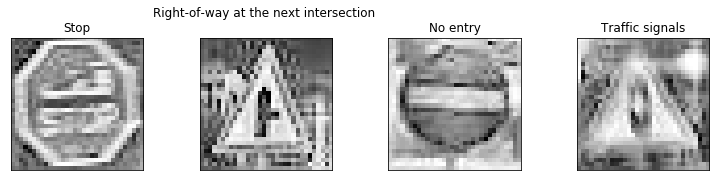





|Prediction|True Class|Predicted Class|
|:--------:|:-------------------------:|:---------------------------:|      
|<span style="color:red">False</span>      |     Stop         |     No entry         |
|<span style="color:green">True</span>      |     Right-of-way at the next intersection            |    Right-of-way at the next intersection            |
|<span style="color:green">True</span>      |     No entry       |     No entry       | 
|<span style="color:red">False</span>      |     Traffic signals                  |     Beware  of ice/snow                |


![uae_test_images_predictions.png](./assets/uae_test_images_predictions.png)

As we can see we go a **50%** accuracy on these **4** images, the images that closely resembled the **German** signs were correctly classified; however, the **Stop** sign which has the same edges as the original dataset was misclassified, maybe thats because the classifier pays more consideration to the content inside the sign edges.

Here are the top `5` Softmax predictions for each of the **UAE** signs:

![uae_sm1.png](./assets/uae_sm1.png)
![uae_sm2.png](./assets/uae_sm2.png)
![uae_sm3.png](./assets/uae_sm3.png)
![uae_sm4.png](./assets/uae_sm4.png)

As we can see trend of getting near `100%` prediction is continuing here even for the misclassified signs; we got the right prediction for the **Stop** sign as the third Softmax minuscule prediction of `2.9229063880089016e-28%`. In the case of the **Traffic signals** we didn't get the correct label in any of the Softmax predictions, but we got all of the triangular signs in the top `5` predictions except for the **Traffic signals** which means that the network could identify the sign's shape but failed to classify the figure inside.

## Visualizing the Neural Network 

Here we'll visualize the neural network's 3 `convolutional` layers' activations and discuss how the network captures information from a stimuli image. All these activations were taken before the trailing `maxpooling` layer.


### First Convolutional Layer

![conv1_activation.png](./assets/conv1.png)

So here we have the `MoNet0.1.3` First Convolutional Layer resulting filters, we can see that the each of the 32 filters captures the curves and edges of the **Speed limit (20 km/h)**. Mainly the filters focus on the edges of the sign and the edges of the digits inside while ignoring whats outside all together. Some of the filters even capture the *graffiti* but not to a high degree, other filters like filter *17* is capturing some noisy representation of the sign. 


### Second Convolutional Layer

![conv2_activation.png](./assets/conv2.png)

Here in the `second layer` we have `64` filters and a `10x10` image, as we can see its really hard to clearly identify the features captured, but we can make out some features like the sign edges like in *41* which shows the lower edges and some filters contain the digit edges as in the case of *23*.

### Last Convolutional Layer

![conv3_activation.png](./assets/conv3.png)

As we dive deeper the features become human unreadable cause our image size decreases and our feature size increases; however, its obvious that our network is still capturing plenty of information in its `128` features. We might event still see some small resemblance to the sign's curved edges. 


## Conclusion
----
First I'd like to thank you for reading and hope you learned something from this project cause I sure did. In the course of this project I've learned a lot about constructing a robust classifier and preparing its training data. I've executed many tests and looked at many graphs which gave me an understanding of how certain techniques alone or in combination with others affect the model; for example applying **normalization** helps the network learn faster, **dropout**  combined with a higher number of epochs gives better results and prevents overfitting to a degree, and **data augmentation** and the relative approach used in the project helps the network learn better and it rockets the accuracy up (well just `2-3%` but its good enough). This was a really fun project and I enjoyed working on it way much than I should cause it took me a lot of time to finish, but it was a great experience and hopefully I'll come back to it and improve a lot more upon it and get the accuracy a bit higher.

## Potential Shortcomings 

Here are the shortcomings that I discovered and things that are truly bugging me :
1. Increasing the model **test accuracy** from `98.2%`
2. **RGBG** gives bad results, but it should give more information.
3. Model `0.1.4` and `0.1.5` especial case weird behaviour need further investigation.  

## Suggested Solutions
1. Better augmentation algorithm to increase the dataset size and still gives us a uniform dataset.
2. Maybe in order for the **RGBG** combo to work I need to have a deeper network.
3. Further investigation in some of the model variations

## Future Improvements and Projects

* I'm planning to build a traffic signs recognizer and combine it with the classifier to have a fully fledged traffic signs classifier, I'm planning on doing this in a mobile app so it can be easily used for testing.
* I'm also planning to further explore the idea and use the model on the **UAE** traffic signs and see if I can achieve closer result to the **German** traffic signs dataset.
* I also want to try batch normalization, I already tried it many times in the project but I got very bad result, so I'll try it out again sometime in the future.

Please share with me any shortcomings you've notices or improvements that I can apply or may help in future projects, your advice is deeply appreciated. :)